In [1]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LogisticRegression
from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,matthews_corrcoef
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing
from sklearn.model_selection import GridSearchCV

In [2]:
for i in range(45):
    if i==0:
        train = pd.read_pickle('salida/nuevo4a/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/SICK/TRAIN_'+str(i+1)+'.csv_.pickle')
            train=pd.concat([train,temp])
        except:
            pass

In [3]:
train=train.reset_index(drop=True)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,,0,,0.800000,CONTRADICTION
1,0.516922,1.424649,1.913,1.379,3.886845,0.005261,0.299131,2,0.142857,0,8,1,7,0.875000,0,,0,,0.333333,CONTRADICTION
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,,0,,0.400000,ENTAILMENT
3,0.389672,5.665914,1.909,1.684,3.834346,0.006025,0.180114,1,0.800000,0,8,4,5,0.375000,0,,0,,0.333333,CONTRADICTION
4,0.636971,5.667255,2.183,1.829,3.843050,0.005226,0.204331,2,0.571429,1,8,4,7,0.500000,0,,0,,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,,0,,0.200000,CONTRADICTION
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,,1,play,0.000000,CONTRADICTION
4436,0.339686,4.269772,1.688,1.426,3.769900,0.006447,0.267681,3,0.600000,1,6,3,5,0.000000,0,,0,,0.000000,CONTRADICTION
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,,0,,0.333333,CONTRADICTION


<Axes: title={'center': 'list_incomp'}, xlabel='clases'>

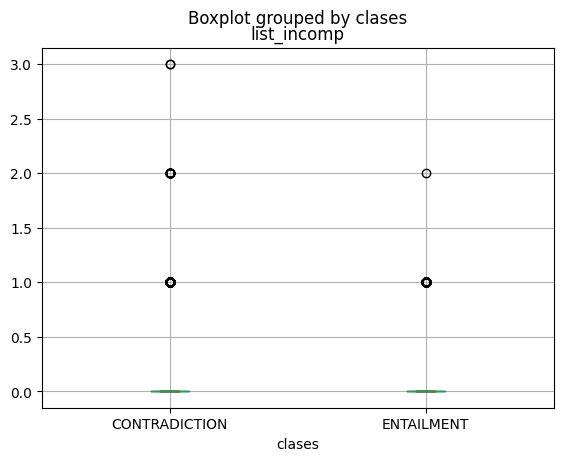

In [4]:
train.boxplot(by="clases",column="list_incomp")

## Eliminar características

In [5]:
# Diferencia entre entropia total - entropias y dejar la columna
# Quitar max_info_p
# revisar scaler y/o normalización de shape con total
#
train=train.drop(["verbH","verbT"],axis=1)
#train=train.drop(["Match"],axis=1)
train

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.000000,0.000000,2.097,0.000,0.000000,0.000000,0.000000,1,0.000000,0,7,0,8,0.857143,0,0,0.800000,CONTRADICTION
1,0.516922,1.424649,1.913,1.379,3.886845,0.005261,0.299131,2,0.142857,0,8,1,7,0.875000,0,0,0.333333,CONTRADICTION
2,0.000000,0.000000,2.176,0.000,0.000000,0.000000,0.000000,1,0.000000,0,5,0,7,1.000000,0,0,0.400000,ENTAILMENT
3,0.389672,5.665914,1.909,1.684,3.834346,0.006025,0.180114,1,0.800000,0,8,4,5,0.375000,0,0,0.333333,CONTRADICTION
4,0.636971,5.667255,2.183,1.829,3.843050,0.005226,0.204331,2,0.571429,1,8,4,7,0.500000,0,0,0.166667,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4434,0.062812,5.751723,1.053,0.811,3.786475,0.006455,0.084316,1,1.333333,0,6,4,3,0.333333,0,0,0.200000,CONTRADICTION
4435,0.073710,5.698565,1.384,1.384,3.779084,0.008525,0.056842,0,1.333333,0,4,4,3,0.250000,0,1,0.000000,CONTRADICTION
4436,0.339686,4.269772,1.688,1.426,3.769900,0.006447,0.267681,3,0.600000,1,6,3,5,0.000000,0,0,0.000000,CONTRADICTION
4437,0.358468,1.437292,1.411,1.459,3.685267,0.004270,0.156616,1,0.166667,0,3,1,6,0.333333,0,0,0.333333,CONTRADICTION


In [6]:
train.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [7]:
#train=train[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]

In [8]:
X = train.drop(['clases'],axis=1)
y_ = train['clases']

In [9]:
# Guardar un nuevo dataframe para la correlación de variables
train_m=train.drop(['clases'],axis=1).corr(method='pearson')

In [10]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.343751,0.337830,0.758922,0.647526,0.400740,0.889427,0.062013,0.217900,0.368798,0.210193,0.346449,0.304879,-0.184579,-0.053075,-0.043708,-0.259338
distancias,0.343751,1.000000,-0.027614,0.690368,0.667805,0.583074,0.345860,0.205688,0.882200,0.295460,0.424893,0.999776,0.110562,-0.641718,-0.053119,0.079775,-0.658989
entropia_total,0.337830,-0.027614,1.000000,0.272153,0.072827,-0.002629,0.285080,0.151013,-0.112965,0.086082,0.251743,-0.027785,0.254476,0.130767,-0.024774,-0.043260,0.050032
entropias,0.758922,0.690368,0.272153,1.000000,0.874351,0.681513,0.758728,0.135420,0.600663,0.360582,0.250972,0.690336,0.167220,-0.487787,-0.070797,0.036209,-0.531986
mutinf,0.647526,0.667805,0.072827,0.874351,1.000000,0.821922,0.698400,0.132984,0.635238,0.336387,0.186653,0.668470,0.067034,-0.522839,-0.094698,0.144336,-0.549665
mearts,0.400740,0.583074,-0.002629,0.681513,0.821922,1.000000,0.462902,0.114908,0.606374,0.255246,0.110548,0.587147,-0.033570,-0.487348,-0.086646,0.094883,-0.510497
max_info,0.889427,0.345860,0.285080,0.758728,0.698400,0.462902,1.000000,0.028045,0.293244,0.503989,0.092180,0.347290,0.122017,-0.223601,-0.053631,-0.034613,-0.294391
list_comp,0.062013,0.205688,0.151013,0.135420,0.132984,0.114908,0.028045,1.000000,0.120440,-0.019108,0.250975,0.204272,0.124348,-0.210503,-0.054427,-0.042616,-0.466392
diferencias,0.217900,0.882200,-0.112965,0.600663,0.635238,0.606374,0.293244,0.120440,1.000000,0.256279,0.212645,0.885676,-0.207900,-0.674825,-0.068015,0.086954,-0.654354
list_incomp,0.368798,0.295460,0.086082,0.360582,0.336387,0.255246,0.503989,-0.019108,0.256279,1.000000,0.080601,0.294553,0.065256,-0.108674,-0.034915,-0.031909,-0.214507


<Axes: >

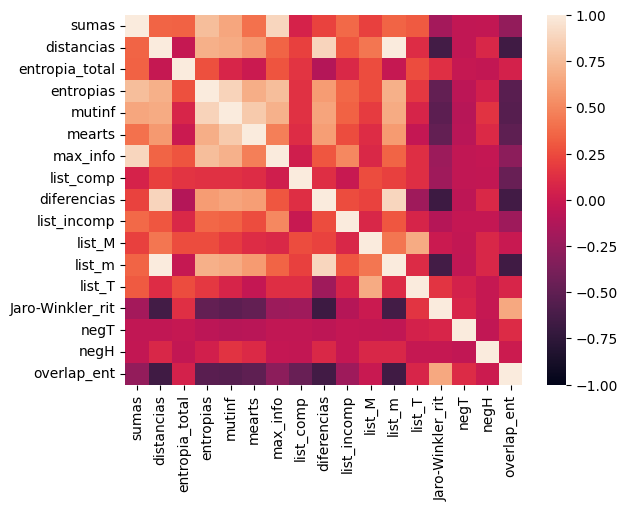

In [11]:
sns.heatmap(train_m,vmin=-1,vmax=1)

In [12]:
train_m.columns

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [13]:
train_m

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,1.000000,0.343751,0.337830,0.758922,0.647526,0.400740,0.889427,0.062013,0.217900,0.368798,0.210193,0.346449,0.304879,-0.184579,-0.053075,-0.043708,-0.259338
distancias,0.343751,1.000000,-0.027614,0.690368,0.667805,0.583074,0.345860,0.205688,0.882200,0.295460,0.424893,0.999776,0.110562,-0.641718,-0.053119,0.079775,-0.658989
entropia_total,0.337830,-0.027614,1.000000,0.272153,0.072827,-0.002629,0.285080,0.151013,-0.112965,0.086082,0.251743,-0.027785,0.254476,0.130767,-0.024774,-0.043260,0.050032
entropias,0.758922,0.690368,0.272153,1.000000,0.874351,0.681513,0.758728,0.135420,0.600663,0.360582,0.250972,0.690336,0.167220,-0.487787,-0.070797,0.036209,-0.531986
mutinf,0.647526,0.667805,0.072827,0.874351,1.000000,0.821922,0.698400,0.132984,0.635238,0.336387,0.186653,0.668470,0.067034,-0.522839,-0.094698,0.144336,-0.549665
mearts,0.400740,0.583074,-0.002629,0.681513,0.821922,1.000000,0.462902,0.114908,0.606374,0.255246,0.110548,0.587147,-0.033570,-0.487348,-0.086646,0.094883,-0.510497
max_info,0.889427,0.345860,0.285080,0.758728,0.698400,0.462902,1.000000,0.028045,0.293244,0.503989,0.092180,0.347290,0.122017,-0.223601,-0.053631,-0.034613,-0.294391
list_comp,0.062013,0.205688,0.151013,0.135420,0.132984,0.114908,0.028045,1.000000,0.120440,-0.019108,0.250975,0.204272,0.124348,-0.210503,-0.054427,-0.042616,-0.466392
diferencias,0.217900,0.882200,-0.112965,0.600663,0.635238,0.606374,0.293244,0.120440,1.000000,0.256279,0.212645,0.885676,-0.207900,-0.674825,-0.068015,0.086954,-0.654354
list_incomp,0.368798,0.295460,0.086082,0.360582,0.336387,0.255246,0.503989,-0.019108,0.256279,1.000000,0.080601,0.294553,0.065256,-0.108674,-0.034915,-0.031909,-0.214507


In [14]:
coor=pd.DataFrame(np.tril(train_m,-1),index=train_m.columns,columns=train_m.columns)
coor

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent
sumas,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
distancias,0.343751,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropia_total,0.337830,-0.027614,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
entropias,0.758922,0.690368,0.272153,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mutinf,0.647526,0.667805,0.072827,0.874351,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
mearts,0.400740,0.583074,-0.002629,0.681513,0.821922,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
max_info,0.889427,0.345860,0.285080,0.758728,0.698400,0.462902,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_comp,0.062013,0.205688,0.151013,0.135420,0.132984,0.114908,0.028045,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
diferencias,0.217900,0.882200,-0.112965,0.600663,0.635238,0.606374,0.293244,0.120440,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0
list_incomp,0.368798,0.295460,0.086082,0.360582,0.336387,0.255246,0.503989,-0.019108,0.256279,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.0


In [15]:
coor.idxmax()

sumas                       max_info
distancias                    list_m
entropia_total              max_info
entropias                     mutinf
mutinf                        mearts
mearts                   diferencias
max_info                 list_incomp
list_comp                     list_M
diferencias                   list_m
list_incomp                   list_m
list_M                        list_T
list_m                        list_T
list_T              Jaro-Winkler_rit
Jaro-Winkler_rit         overlap_ent
negT                     overlap_ent
negH                     overlap_ent
overlap_ent                    sumas
dtype: object

In [16]:
coor.max()

sumas               0.889427
distancias          0.999776
entropia_total      0.285080
entropias           0.874351
mutinf              0.821922
mearts              0.606374
max_info            0.503989
list_comp           0.250975
diferencias         0.885676
list_incomp         0.294553
list_M              0.667383
list_m              0.105768
list_T              0.151661
Jaro-Winkler_rit    0.654934
negT                0.106775
negH                0.003750
overlap_ent         0.000000
dtype: float64

In [17]:
coor.idxmin()

sumas                    overlap_ent
distancias               overlap_ent
entropia_total           diferencias
entropias                overlap_ent
mutinf                   overlap_ent
mearts                   overlap_ent
max_info                 overlap_ent
list_comp                overlap_ent
diferencias         Jaro-Winkler_rit
list_incomp              overlap_ent
list_M                          negT
list_m                   overlap_ent
list_T                          negH
Jaro-Winkler_rit                negH
negT                            negH
negH                           sumas
overlap_ent                    sumas
dtype: object

In [18]:
coor.min()

sumas              -0.259338
distancias         -0.658989
entropia_total     -0.112965
entropias          -0.531986
mutinf             -0.549665
mearts             -0.510497
max_info           -0.294391
list_comp          -0.466392
diferencias        -0.674825
list_incomp        -0.214507
list_M             -0.040202
list_m             -0.659782
list_T             -0.030675
Jaro-Winkler_rit   -0.031086
negT               -0.047197
negH                0.000000
overlap_ent         0.000000
dtype: float64

In [19]:
cols=train_m.columns

In [20]:
cols=train_m.columns
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]>0.7:
            print(index,c,strings[c])

entropias sumas 0.7589217348735281
mutinf entropias 0.8743506077147583
mearts mutinf 0.821922204343471
max_info sumas 0.8894269167789266
max_info entropias 0.7587277094865104
diferencias distancias 0.8822001020586663
list_m distancias 0.9997764685604152
list_m diferencias 0.8856762753680629


In [21]:
temp=coor.copy()
for index, strings in temp.iterrows():
    for c in cols:
        if strings[c]<-0.7:
            print(index,c,strings[c])

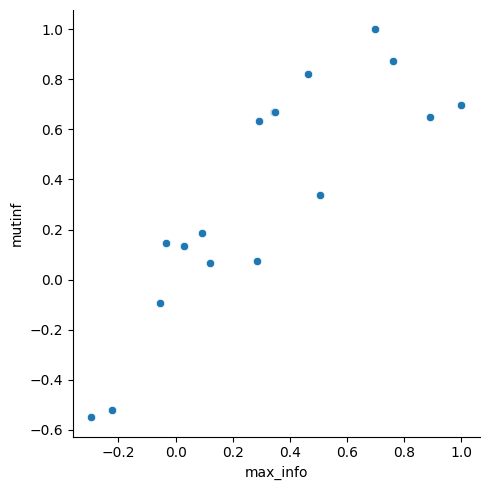

In [22]:
# Checar variables colineales
sns.relplot(data=train_m, x="max_info", y="mutinf")

In [23]:
#X_dev = np.array(dev.drop(['CLASS'],axis=1))
#y_d = np.array(dev['CLASS'])

In [24]:
# SICK
y_train=[]
for i in y_:
    if i == "ENTAILMENT":
        y_train.append(1)
    else:
        y_train.append(0)

In [25]:
scaler = preprocessing.MaxAbsScaler().fit(X)
X_scaled = scaler.transform(X)
X = X_scaled
X_train=X

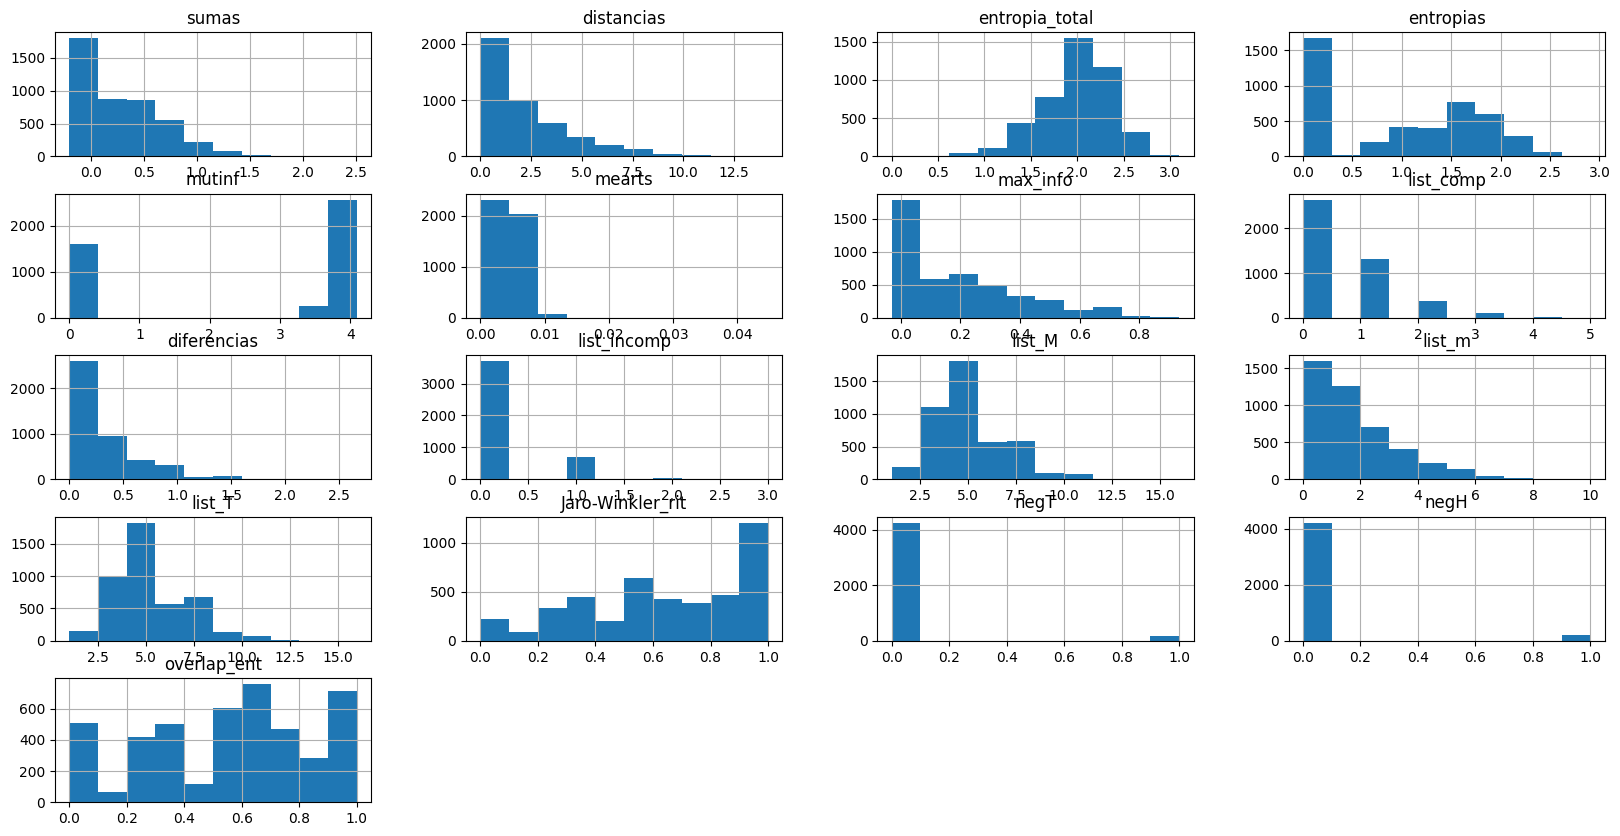

In [26]:
train.hist(figsize=(20,10))
plt.show()

# TEST

In [27]:
for i in range(50):
    if i==0:
        test = pd.read_pickle('salida/nuevo4a/SICK/TEST_'+str(i+1)+'.csv_.pickle')
    else:
        try:
            temp = pd.read_pickle('salida/nuevo4a/SICK/TEST_'+str(i+1)+'.csv_.pickle')
            test=pd.concat([test,temp])
        except:
            pass

In [28]:
test = test.reset_index(drop=True)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,verbT,negH,verbH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,,0,,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,,0,,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,,0,,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,,0,,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,,0,,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,,0,,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,,0,,0.000000,CONTRADICTION
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,,0,,0.000000,CONTRADICTION
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,,0,,0.000000,CONTRADICTION


In [29]:
test=test.drop(["verbH","verbT"],axis=1)
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,CONTRADICTION
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,CONTRADICTION
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,CONTRADICTION


In [30]:
#test=test.drop(["sumas","mutinf","list_comp","list_incomp","entidades","entropia_total","list_rel_con",'mearts', 'max_info', 'similitud_faltantes','list_rel_con', 'list_M', 'list_m', 'list_T', 'list_bigram','diferencias'],axis=1)
#test=test[['list_comp', 'list_incomp','list_m','negT', 'negH',"clases"]]
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,CONTRADICTION
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,CONTRADICTION
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,CONTRADICTION


In [31]:
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,CONTRADICTION
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,CONTRADICTION
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,CONTRADICTION
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,CONTRADICTION
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,CONTRADICTION
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,CONTRADICTION
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,CONTRADICTION
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,CONTRADICTION


In [32]:
X_t = test.drop(['clases'],axis=1)
y_t = test['clases']

In [33]:
# SICK
y_test=[]
for i in y_t:
    if i == "ENTAILMENT":
        y_test.append(1)
    else:
        y_test.append(0)

In [34]:
y_test.count(1)

1404

In [35]:
y_test.count(0)

3502

In [36]:
scaler = preprocessing.MaxAbsScaler().fit(X_t)
X_scaled = scaler.transform(X_t)
X_test = X_scaled

# MODELO DE REGRESIÓN LÓGISTICA

In [37]:
# grid={"C":np.logspace(-3,3,7), "penalty":["l2"]}# l1 lasso l2 ridge
# logreg=linear_model.LogisticRegression()
# logreg_cv=GridSearchCV(logreg,grid,cv=20)
# logreg_cv.fit(X_train,y_train)

In [38]:
# print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
# print("accuracy :",logreg_cv.best_score_)

In [39]:
#X_train = np.where(np.isnan(X_train), 0, X_train)
#X_train

In [40]:
X_train.shape

(4439, 17)

In [41]:
model = LogisticRegression(penalty="l2", C=1)
model.fit(X_train,y_train)

LogisticRegression(C=1)

In [42]:
model.get_params()

{'C': 1,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [43]:
model.decision_function(X)

array([ 0.55008889, -2.09014376, -0.60328484, ..., -3.57655032,
       -2.00627557, -4.54742214])

In [44]:
labels=train.columns[:-1]
labels

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent'],
      dtype='object')

In [45]:
model.classes_

array([0, 1])

In [46]:
model.coef_[0]

array([ 1.66141162, -1.40529936,  1.30552457,  0.2892429 , -1.42658361,
        1.37168152,  0.05398196,  1.90953163, -0.74619893, -0.05942002,
       -2.67591896, -1.28806981,  0.99939163,  0.04320647, -4.29826313,
       -2.06514115,  3.66208266])

In [47]:
coeficientes=model.coef_[0]

In [48]:
coeficientes

array([ 1.66141162, -1.40529936,  1.30552457,  0.2892429 , -1.42658361,
        1.37168152,  0.05398196,  1.90953163, -0.74619893, -0.05942002,
       -2.67591896, -1.28806981,  0.99939163,  0.04320647, -4.29826313,
       -2.06514115,  3.66208266])

In [49]:
print("Maximo,minimo ",np.argmax(coeficientes),labels[np.argmax(coeficientes)],np.argmin(coeficientes),labels[np.argmin(coeficientes)])

Maximo,minimo  16 overlap_ent 14 negT


In [50]:
n_columns=train.shape[1]-1

In [51]:
n_columns

17

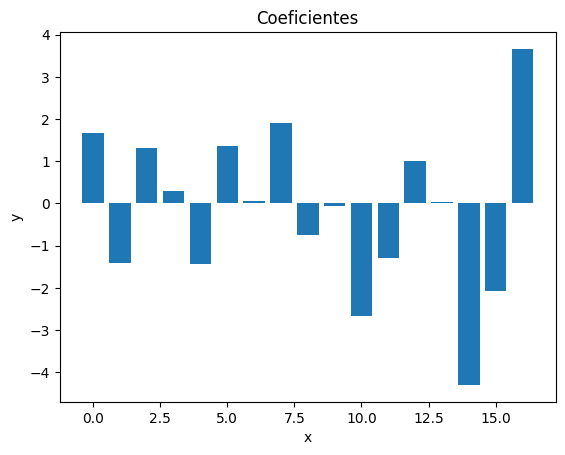

In [52]:
import matplotlib.pyplot as plt
import numpy as np

x_v = np.arange(0,n_columns,1)
y_v = coeficientes

plt.bar(x_v,y_v)
plt.xlabel('x')
plt.ylabel('y')
plt.title('Coeficientes')
plt.show()

In [53]:
#X_test = np.where(np.isnan(X_test), 0, X_test)
#X_test

In [54]:
X_test.shape

(4906, 17)

In [55]:
predictions = model.predict(X_test)

In [56]:
test["predictions"]=predictions
test

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
0,0.423790,5.644226,2.089,1.685,3.811686,0.005501,0.190288,2,0.800000,0,8,4,5,0.375000,0,0,0.000000,CONTRADICTION,0
1,0.361121,2.850177,2.018,1.264,3.855514,0.005729,0.118164,2,0.285714,0,7,2,7,0.714286,0,0,0.666667,CONTRADICTION,0
2,0.368295,2.836368,1.951,1.095,3.814045,0.005747,0.096256,3,0.285714,0,7,2,7,0.428571,0,0,0.333333,CONTRADICTION,0
3,0.000000,0.000000,1.881,0.000,0.000000,0.000000,0.000000,0,0.000000,0,7,0,8,1.000000,0,0,1.000000,ENTAILMENT,1
4,0.203490,1.437611,1.611,0.985,3.978109,0.006914,0.074974,0,0.142857,0,7,1,7,0.857143,0,0,0.833333,CONTRADICTION,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4901,0.165464,4.327404,1.919,1.472,3.803848,0.005847,0.114092,0,0.600000,0,4,3,5,0.250000,0,0,0.250000,CONTRADICTION,0
4902,-0.007229,2.913927,1.579,1.157,3.769402,0.005909,0.063093,2,0.400000,0,4,2,5,0.250000,0,0,0.000000,CONTRADICTION,0
4903,0.096561,5.746273,0.748,0.669,3.698120,0.005845,0.112530,1,1.000000,0,5,4,4,0.000000,0,0,0.000000,CONTRADICTION,0
4904,0.431280,8.434960,1.393,1.233,3.809083,0.006834,0.142375,2,1.000000,0,8,6,6,0.375000,0,0,0.000000,CONTRADICTION,0


In [57]:
test[(test["clases"]=="ENTAILMENT") & (test["predictions"]==0)]

,sumas,distancias,entropia_total,entropias,mutinf,mearts,max_info,list_comp,diferencias,list_incomp,list_M,list_m,list_T,Jaro-Winkler_rit,negT,negH,overlap_ent,clases,predictions
9,0.735153,1.434262,2.423,1.459,3.806307,0.008551,0.514878,0,0.166667,1,6,1,6,1.000000,0,0,0.800000,ENTAILMENT,0
17,0.000000,0.000000,2.797,0.000,0.000000,0.000000,0.000000,0,0.000000,0,6,0,7,0.500000,0,0,0.400000,ENTAILMENT,0
18,1.763844,1.357598,2.501,1.842,3.696841,0.003618,0.585392,0,0.142857,0,6,1,7,0.833333,0,0,0.666667,ENTAILMENT,0
24,0.219207,1.394025,1.889,0.971,3.885459,0.004431,0.087943,0,0.200000,0,5,1,5,0.800000,0,0,1.000000,ENTAILMENT,0
39,0.366803,1.447200,1.943,1.000,3.785758,0.006490,0.147189,0,0.125000,0,8,1,8,0.875000,0,0,0.400000,ENTAILMENT,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4760,0.839198,2.860215,2.480,2.407,3.820276,0.004483,0.312808,2,0.285714,0,8,2,7,0.750000,0,0,0.600000,ENTAILMENT,0
4763,0.000000,0.000000,1.224,0.000,0.000000,0.000000,0.000000,1,0.000000,0,3,0,3,1.000000,0,0,0.500000,ENTAILMENT,0
4769,0.760988,1.409621,2.531,1.500,4.011932,0.005138,0.318978,0,0.250000,0,4,1,4,1.000000,0,0,0.666667,ENTAILMENT,0
4772,1.002300,1.446875,2.356,1.880,3.857504,0.005130,0.390022,2,0.111111,0,4,1,9,0.750000,0,0,0.333333,ENTAILMENT,0


In [58]:
#test.to_csv("predictions_SICK_DEV.csv")

In [59]:
print(confusion_matrix(y_test, predictions,labels=[1,0]))

[[ 902  502]
 [ 432 3070]]


In [60]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions),2))
print("recall",round(recall_score(y_test,predictions),2))
print("f1_score: ",round(f1_score(y_test,predictions),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.68
recall 0.64
f1_score:  0.66
matthews_score:  0.53


In [61]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="micro"),2))
print("recall",round(recall_score(y_test,predictions,average="micro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="micro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.81
recall 0.81
f1_score:  0.81
matthews_score:  0.53


In [62]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="macro"),2))
print("recall",round(recall_score(y_test,predictions,average="macro"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="macro"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.77
recall 0.76
f1_score:  0.76
matthews_score:  0.53


In [63]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="weighted"),2))
print("recall",round(recall_score(y_test,predictions,average="weighted"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="weighted"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.81
recall 0.81
f1_score:  0.81
matthews_score:  0.53


In [64]:
print("acccuracy: ",round(accuracy_score(y_test,predictions),2))
print("precision: ",round(precision_score(y_test,predictions,average="binary"),2))
print("recall",round(recall_score(y_test,predictions,average="binary"),2))
print("f1_score: ",round(f1_score(y_test,predictions,average="binary"),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,predictions),2))

acccuracy:  0.81
precision:  0.68


recall 0.64
f1_score:  0.66
matthews_score:  0.53


In [65]:
X_train.shape

(4439, 17)

In [66]:
X_test.shape

(4906, 17)

In [67]:
X_cv=np.concatenate((X_train, X_test), axis=0)
Y_cv=np.concatenate((y_train, y_test), axis=0)

In [68]:
#validation_size = 0.20
#X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)
X_train_cv=X_cv
Y_train_cv=Y_cv

In [69]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='accuracy')
msg = "%s: %f (%f)" % (name + " Acurracy:" , round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_weighted')
msg += "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_weighted')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_weighted')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression Acurracy:: 0.800000 (0.016074)
Logistic Regression Precision:: 0.800000 (0.017629)
Logistic Regression Recall:: 0.800000 (0.016074)
Logistic Regression F1-score:: 0.800000 (0.017007)


In [70]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_macro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_macro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_macro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.760000 (0.020184)
Logistic Regression Recall:: 0.750000 (0.027461)
Logistic Regression F1-score:: 0.750000 (0.023154)


In [71]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.660000 (0.047776)
Logistic Regression Recall:: 0.620000 (0.070370)
Logistic Regression F1-score:: 0.640000 (0.052285)


In [72]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='precision_micro')
msg = "\n%s: %f (%f)" % (name+ " Precision:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='recall_micro')
msg += "\n%s: %f (%f)" % (name+ " Recall:", round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='f1_micro')
msg += "\n%s: %f (%f)" % (name+ " F1-score:", round(cv_results.mean(),2), cv_results.std())
print(msg)


Logistic Regression Precision:: 0.800000 (0.016074)
Logistic Regression Recall:: 0.800000 (0.016074)
Logistic Regression F1-score:: 0.800000 (0.016074)


In [73]:
name='Logistic Regression'
kfold = model_selection.KFold(n_splits=10)
cv_results = model_selection.cross_val_score(model, X_train_cv, Y_train_cv, cv=kfold, scoring='matthews_corrcoef')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

Logistic Regression: 0.500000 (0.045571)


In [74]:
import shap
import pandas as pd
import numpy as np
shap.initjs()

IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


In [125]:
#linear_model

In [126]:
# model = LogisticRegression()
# model.fit(X_train,y_train)

In [75]:
y_predict = model.predict(X_test)
print(classification_report( y_test,y_predict))

              precision    recall  f1-score   support

           0       0.86      0.88      0.87      3502
           1       0.68      0.64      0.66      1404

    accuracy                           0.81      4906
   macro avg       0.77      0.76      0.76      4906
weighted avg       0.81      0.81      0.81      4906



In [76]:
explainer = shap.Explainer(model,X_train,feature_names=test.columns[:-1])
shap_values = explainer(X_test)

In [77]:
test.columns[:-1]

Index(['sumas', 'distancias', 'entropia_total', 'entropias', 'mutinf',
       'mearts', 'max_info', 'list_comp', 'diferencias', 'list_incomp',
       'list_M', 'list_m', 'list_T', 'Jaro-Winkler_rit', 'negT', 'negH',
       'overlap_ent', 'clases'],
      dtype='object')

In [78]:
explainer.expected_value

-1.4506692122373674

In [79]:
X_test

array([[0.16892324, 0.39536554, 0.68290291, ..., 0.        , 0.        ,
        0.        ],
       [0.14394303, 0.19964858, 0.65969271, ..., 0.        , 0.        ,
        0.66666667],
       [0.14680285, 0.19868131, 0.63779013, ..., 0.        , 0.        ,
        0.33333333],
       ...,
       [0.03848948, 0.40251367, 0.24452435, ..., 0.        , 0.        ,
        0.        ],
       [0.17190848, 0.5908503 , 0.45537757, ..., 0.        , 0.        ,
        0.        ],
       [0.08931331, 0.4069092 , 0.52598889, ..., 0.        , 0.        ,
        0.        ]])

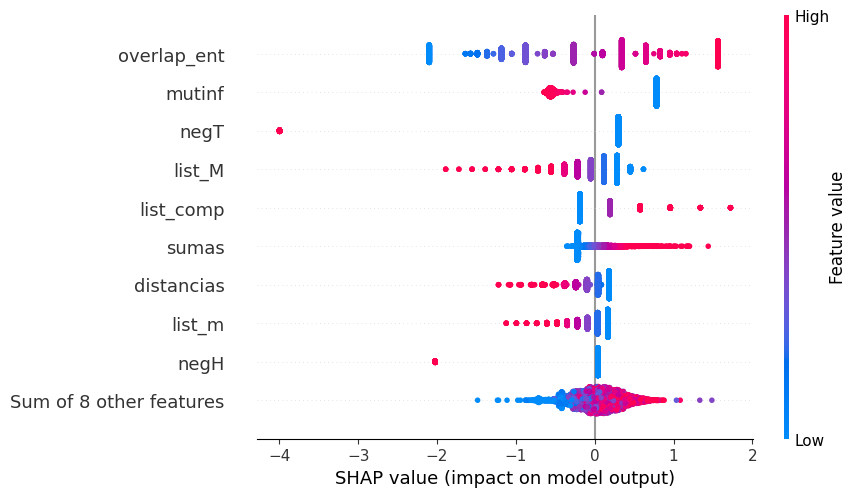

In [81]:
shap.plots.beeswarm(shap_values)

In [133]:
ind = 21
print(X_test[ind],y_test[ind],y_predict[ind])
shap.plots.force(shap_values[ind])
shap.plots.waterfall(shap_values[ind])

[0.4751967  0.24555819 0.87544949 0.78537126 0.93112685 0.10731264
 0.47481402 0.25       0.0952381  0.         0.375      0.25
 0.4        0.83333333 0.         0.         0.25      ] 0 0


IndexError: index 17 is out of bounds for axis 0 with size 17

In [134]:
ind = 6
print(X_test[ind])
# This amazing documentary gives us a glimpse into the lives of the brave
# women in Cameroun's judicial system-- policewomen, lawyers and judges. Despite
# tremendous difficulties-- lack of means, the desperate poverty of the people, multiple
# languages and multiple legal precedents depending on the region of the country and
# the religious/ethnic background of the plaintiffs and defendants-- these brave,
# strong women are making a difference. [...]

shap.plots.waterfall(shap_values[ind,:,1])

[0.12572709 0.25258803 0.53743053 0.46693757 0.95367512 0.16914902
 0.12524514 0.         0.08163265 0.         0.1875     0.25
 0.46666667 0.33333333 0.         0.         0.        ]


IndexError: index 1 is out of bounds for axis 2 with size 1

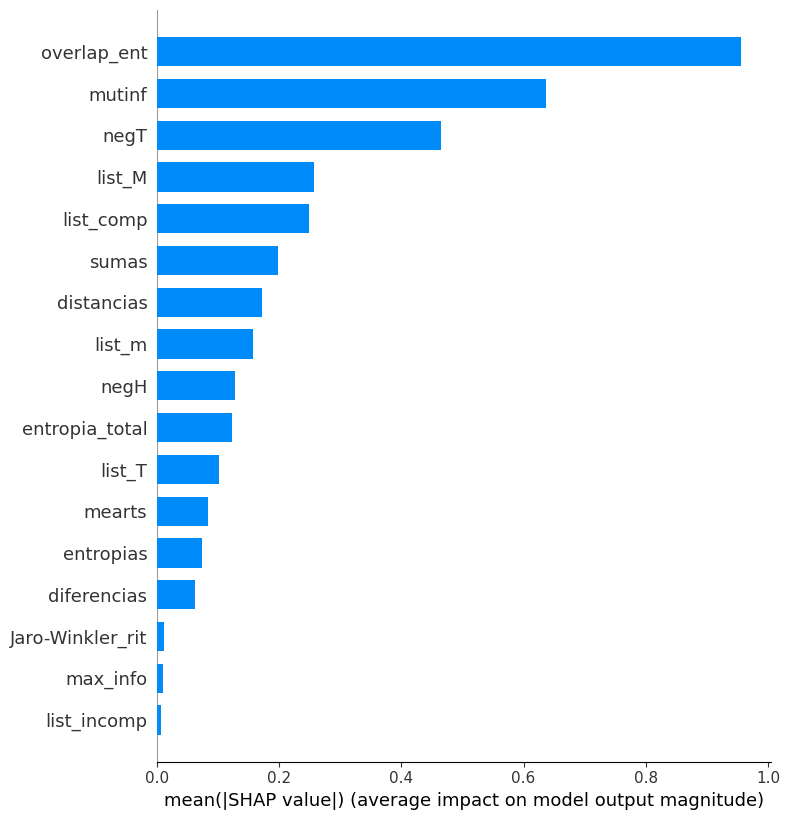

In [82]:
shap.summary_plot(shap_values, X_test,plot_type="bar")

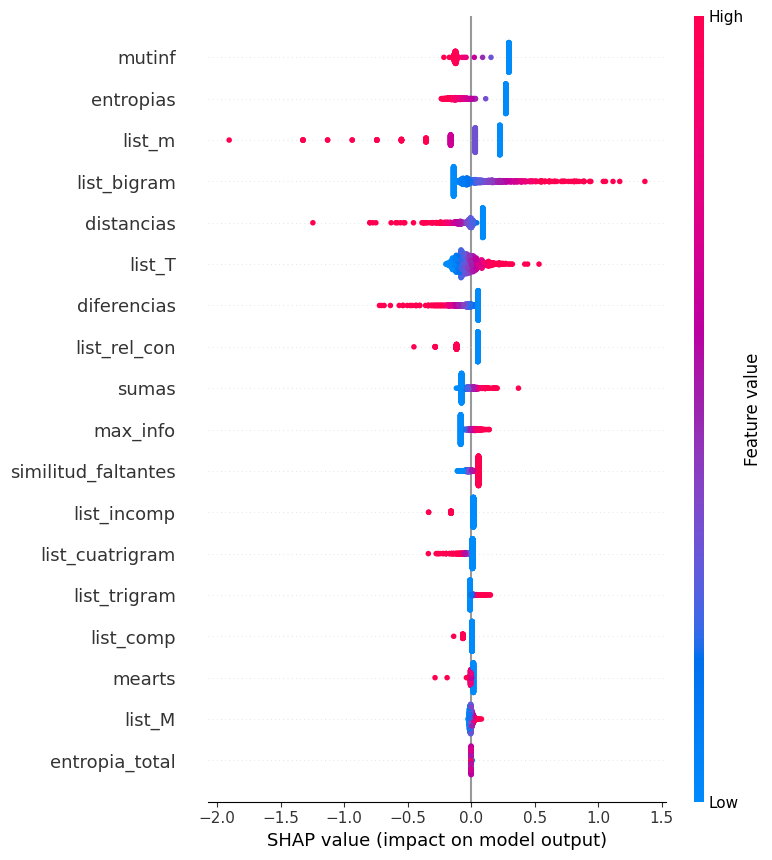

In [81]:
shap.summary_plot(shap_values[1:,], X_test[1:,])

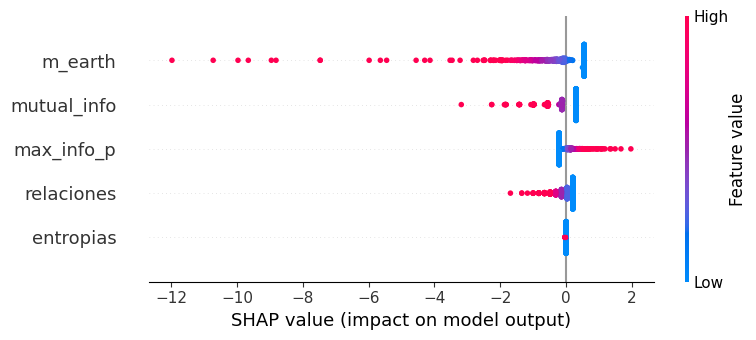

In [ ]:
shap.summary_plot(shap_values, X_test,feature_names=test.columns[:-1])

In [ ]:
shap_values[2:,]

.values =
array([[ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683],
       [-0.01299836, -0.11268555, -0.4045574 ,  0.04382668,  0.21114683],
       ...,
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.03866018],
       [ 0.00911714,  0.30959951,  0.55679351, -0.20535715,  0.21114683]])

.base_values =
array([-0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.74544388, -0.74544388, -0.74544388, -0.74544388, -0.74544388,
       -0.745

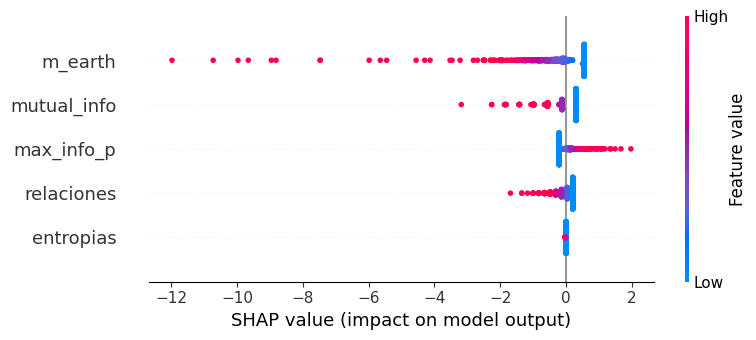

In [ ]:
shap.summary_plot(shap_values[0:,], X_test,feature_names=test.columns[:-1])

In [ ]:
explainer.expected_value

-0.7454438806409415

In [ ]:
shap_values.shape

(800, 5)

# Árbol de decisión

In [83]:
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [84]:
clf = DecisionTreeClassifier(splitter="random")
clf.fit(X_train, y_train)
y_pred = clf.predict(X_test)

In [85]:
print("acccuracy: ",round(accuracy_score(y_test,y_pred),2))
print("precision: ",round(precision_score(y_test,y_pred),2))
print("recall",round(recall_score(y_test,y_pred),2))
print("f1_score: ",round(f1_score(y_test,y_pred),2))
print("matthews_score: ",round(matthews_corrcoef(y_test,y_pred),2))

acccuracy:  0.78
precision:  0.61
recall 0.69
f1_score:  0.65
matthews_score:  0.49


In [86]:
validation_size = 0.01
X_train_cv, X_validation_cv, Y_train_cv, Y_validation_cv = model_selection.train_test_split(X_cv, Y_cv, test_size=validation_size)

In [87]:
name='DecisionTree'
kfold = model_selection.KFold(n_splits=20)
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='precision')
msg = "%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='recall')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
cv_results = model_selection.cross_val_score(clf, X_train_cv, Y_train_cv, cv=kfold, scoring='f1')
msg += "\n%s: %f (%f)" % (name, round(cv_results.mean(),2), cv_results.std())
print(msg)

DecisionTree: 0.670000 (0.048836)
DecisionTree: 0.660000 (0.035226)
DecisionTree: 0.670000 (0.033797)


In [88]:
c=train.columns[:-1]
confusion_matrix(y_test,y_pred)

array([[2874,  628],
       [ 434,  970]])

Profundidad del árbol: 29
Número de nodos terminales: 1014


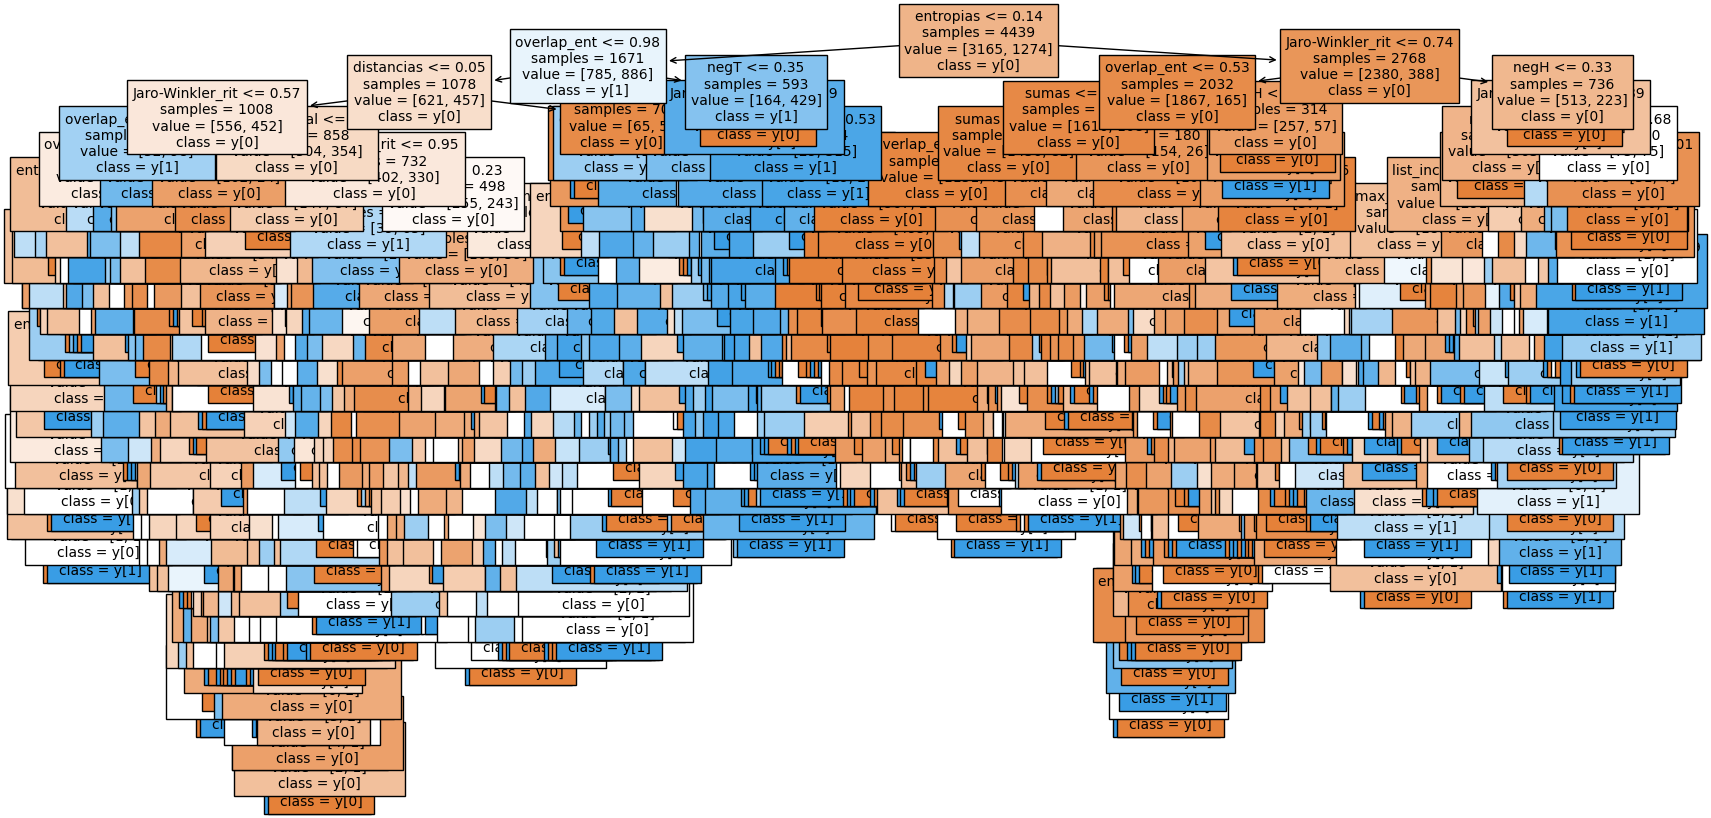

In [89]:
# Estructura del árbol creado
import matplotlib.pyplot as plt
# ------------------------------------------------------------------------------
fig, ax = plt.subplots(figsize=(20, 10))

print(f"Profundidad del árbol: {clf.get_depth()}")
print(f"Número de nodos terminales: {clf.get_n_leaves()}")

plot = plot_tree(
            decision_tree = clf,
            feature_names = c,
            class_names   = True,
            filled        = True,
            impurity      = False,
            fontsize      = 10,
            precision     = 2,
            ax            = ax
       )